In [1]:
import numpy as np
import pandas as pd
# Plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
# CSV File - Read
df = pd.read_csv('CreditRiskTrainData.csv')
print(df.head(5)) 

print(df.ndim)

print(df.shape)

print(df.columns)

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [2]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [3]:
from collections import Counter
Counter(df['Gender'])

Counter({'Male': 489, 'Female': 112, nan: 13})

In [4]:
# Fill Empty data to Male
gender_null = df[df['Gender'].isnull()].index.tolist()
df['Gender'].iloc[gender_null] = "Male"
Counter(df['Gender'])

/Users/jagruti/Desktop/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Counter({'Male': 502, 'Female': 112})

In [5]:
Counter(df['Married'])


Counter({'No': 213, 'Yes': 398, nan: 3})

In [6]:
gender_null = df[df['Married'].isnull()].index.tolist()
df['Married'].iloc[gender_null] = "Yes"

In [7]:
Counter(df['Dependents'])

Counter({'0': 345, '1': 102, '2': 101, '3+': 51, nan: 15})

In [8]:
gender_null = df[df['Dependents'].isnull()].index.tolist()
df['Dependents'].iloc[gender_null] = "0"

In [9]:
Counter(df['Self_Employed'])

Counter({'No': 500, 'Yes': 82, nan: 32})

In [10]:
gender_null = df[df['Self_Employed'].isnull()].index.tolist()
df['Self_Employed'].iloc[gender_null] = "No"

In [11]:
df.groupby(df['Loan_Amount_Term'])['LoanAmount'].mean()

Loan_Amount_Term
12.0     111.000000
36.0     117.500000
60.0     140.000000
84.0     132.250000
120.0     22.333333
180.0    147.523810
240.0    118.333333
300.0    185.153846
360.0    147.245436
480.0    151.800000
Name: LoanAmount, dtype: float64

In [12]:
pd.crosstab( df['LoanAmount'].isnull(), df['Loan_Amount_Term'])

Loan_Amount_Term,12.0,36.0,60.0,84.0,120.0,180.0,240.0,300.0,360.0,480.0
LoanAmount,,,,,,,,,,
False,1,2,2,4,3,42,3,13,493,15
True,0,0,0,0,0,2,1,0,19,0


In [13]:
df['LoanAmount'][ ( df['LoanAmount'].isnull())] = 130

/Users/jagruti/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
(df['Loan_Amount_Term']).value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [15]:
df['Loan_Amount_Term'][ ( df['Loan_Amount_Term'].isnull())] = 360

/Users/jagruti/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
df['Credit_History'].value_counts()
df['Credit_History'][ ( df['Credit_History'].isnull())] = 0

/Users/jagruti/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
dfNew = pd.get_dummies(df.drop(['Loan_ID'],axis=1) ,drop_first=True)
dfNew.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,130.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [22]:
from sklearn.model_selection import cross_val_score
dfInput = dfNew.iloc[:,0:14] 
print(dfInput.head())
dfoutput = dfNew.iloc[:,-1]
print(dfoutput.head())


split = int(0.8*len(dfNew))
X_train, X_test, Y_train, Y_test = dfInput[:split], dfInput[split:], dfoutput[:split], dfoutput[split:]

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       130.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Gender_Male  Married_Yes  Dependents_1  Dependents_2  \
0             1.0            1            0             0             0   
1             1.0            1            1             1             0   
2             1.0            1            1             0             0   
3             1.0            1            1             0             0   
4             1.0            1            0             0             0   

   Dependents_3+  Education_Not Graduate  Self_Employed_Yes  \
0              0                       0                  0

In [23]:
dfNew2 = dfNew.query('ApplicantIncome < 16000')
print(dfNew2.shape)
X = dfNew2.iloc[:,[0,2]]
print(X.head())
Y = dfNew2.iloc[:,-1] 
print(Y.head())

(590, 15)
   ApplicantIncome  LoanAmount
0             5849       130.0
1             4583       128.0
2             3000        66.0
3             2583       120.0
4             6000       141.0
0    1
1    0
2    1
3    1
4    1
Name: Loan_Status_Y, dtype: uint8


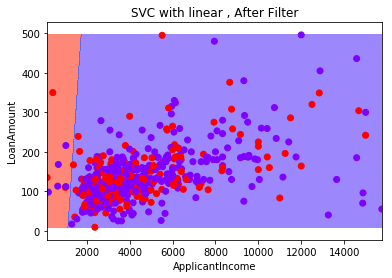

In [24]:
from sklearn import svm
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1,gamma=1).fit(X, Y)
# create a mesh to plot in
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
h = (x_max / x_min)/100

#print(x_min, x_max, h)

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#print(xx,yy)


Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow_r, alpha=0.6)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, cmap=plt.cm.rainbow_r)
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear , After Filter')
plt.show()

In [25]:
from sklearn.svm import SVC
model =SVC()
model.fit(X,Y)
pred = model.predict(X)

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(Y,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       185
           1       1.00      1.00      1.00       405

   micro avg       1.00      1.00      1.00       590
   macro avg       1.00      0.99      1.00       590
weighted avg       1.00      1.00      1.00       590



/Users/jagruti/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


model score:: 0.9966101694915255


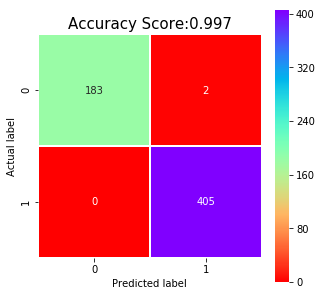

In [26]:
#print(confusion_matrix(Y_test,pred))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = confusion_matrix(Y , pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.8, square = True, cmap = 'rainbow_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

ms = model.score(X,Y)
print("model score::",ms)
all_sample_title = 'Accuracy Score:{:0.3f}'.format(ms)
plt.title(all_sample_title, size = 15);